In [1]:
import pandas as pd

titanic = pd.read_csv('train.csv')

titanic.info(),titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

C:\Users\Home\AppData\Local\Temp\ipykernel_13804\1107105735.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=titanic, ax=axes[1],palette={"female":"red","male":"blue"})


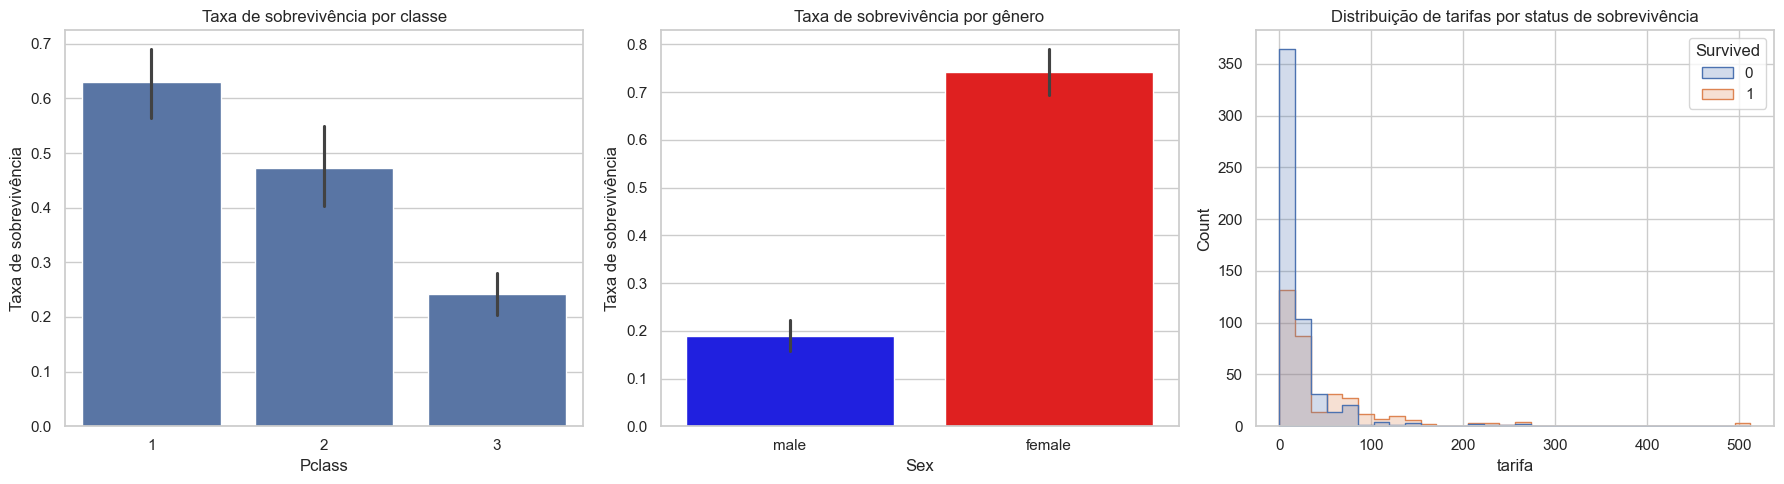

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Este comando configura o estilo dos gráficos para "whitegrid", que adiciona uma grade branca no fundo do gráfico, o que facilita a visualização dos dados em gráficos estatísticos.
sns.set(style="whitegrid")

# Aqui, estamos criando uma figura (fig) com três gráficos lado a lado (1, 3). O parâmetro figsize=(18, 5) define o tamanho da figura (18 de largura por 5 de altura).
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# sns.barplot cria um gráfico de barras onde o eixo x representa a classe do passageiro (Pclass), e o eixo y mostra a taxa média de sobrevivência (Survived).
# data=titanic indica que estamos usando o conjunto de dados titanic.
# ax=axes[0] define que o gráfico será inserido na primeira posição (axes[0]) da figura.
# set_title e set_ylabel adicionam o título e o rótulo do eixo y para o gráfico.
sns.barplot(x="Pclass", y="Survived", data=titanic, ax=axes[0])
axes[0].set_title("Taxa de sobrevivência por classe")
axes[0].set_ylabel("Taxa de sobrevivência")

# Este gráfico é semelhante ao anterior, mas comparamos a taxa de sobrevivência (Survived) em relação ao gênero (Sex). Novamente, set_title e set_ylabel definem o título e o rótulo do eixo y
sns.barplot(x="Sex", y="Survived", data=titanic, ax=axes[1],palette={"female":"red","male":"blue"})
axes[1].set_title("Taxa de sobrevivência por gênero")
axes[1].set_ylabel("Taxa de sobrevivência")

# Aqui, usamos sns.histplot para criar um histograma que mostra a distribuição das tarifas (Fare) pagas pelos passageiros. Os sobreviventes e os não sobreviventes são diferenciados pela cor, definida pelo parâmetro hue="Survived". O parâmetro element="step" deixa o histograma no estilo "passo a passo", e bins=30 divide a faixa de valores em 30 intervalos
sns.histplot(titanic, x="Fare", hue="Survived", element="step", ax=axes[2], bins=30)
axes[2].set_title("Distribuição de tarifas por status de sobrevivência")
axes[2].set_xlabel("tarifa")
# plt.tight_layout() ajusta o espaçamento entre os subplots, evitando sobreposição. plt.show() exibe a figura com os gráficos
plt.tight_layout()
plt.show()

In [3]:
# Verifique a distribuição de passageiros com tarifas altas entre as classes
# Defina um limite de tarifa alto, como o percentil 75 para identificar "tarifas mais altas"
# O percentil é uma medida estatística que indica a posição relativa de um valor dentro de um conjunto de dados ordenado. Quando falamos de percentis, dividimos os dados em 100 partes iguais e encontramos a posição onde uma certa porcentagem dos dados fica abaixo daquele valor.
limite_taxa_alta = titanic["Fare"].quantile(0.75)

# Filtrar passageiros com tarifas acima deste limite
passageiros_alta_tarifa = titanic[titanic["Fare"] > limite_taxa_alta]

# Conte a distribuição desses passageiros com tarifas altas por classe
distribuição_de_classe_de_taxa_alta = passageiros_alta_tarifa["Pclass"].value_counts(normalize=True) * 100
distribuição_de_classe_de_taxa_alta

Pclass
1    71.621622
3    18.468468
2     9.909910
Name: proportion, dtype: float64

In [4]:
#  media da idade de sobrevivente que conseguiram sobreviver
media_idade_surv_vivo = titanic[titanic["Survived"] == 1]["Age"].mean()

# A media da idade de sobrevivente que não sobreviveu 
media_idade_surv_morto = titanic[titanic["Survived"] == 0]["Age"].mean()

media_idade_surv_vivo, media_idade_surv_morto

(28.343689655172415, 30.62617924528302)

In [5]:
idade_surv_vivo = titanic[titanic["Survived"] == 1]["Age"].value_counts()
idade_surv_morto = titanic[titanic["Survived"] == 0]["Age"].value_counts()

idade_surv_vivo,idade_surv_morto

(Age
 24.00    15
 36.00    11
 35.00    11
 27.00    11
 22.00    11
          ..
 55.00     1
 32.50     1
 12.00     1
 0.92      1
 47.00     1
 Name: count, Length: 65, dtype: int64,
 Age
 21.0    19
 28.0    18
 25.0    17
 18.0    17
 22.0    16
         ..
 15.0     1
 36.5     1
 23.5     1
 55.5     1
 74.0     1
 Name: count, Length: 77, dtype: int64)

In [6]:
from IPython.display import display

# Supondo que 'titanic' seja um DataFrame pandas com as colunas 'Ticket' e 'Pclass'
# Extraindo o prefixo de cada número de ticket
titanic['TicketPrefix'] = titanic['Ticket'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).strip())

# Calculando a distribuição percentual das classes dentro de cada prefixo
ticket_class_relation = titanic.groupby('TicketPrefix')['Pclass'].value_counts(normalize=True).unstack().fillna(0) * 100

# Exibir a tabela com um título
print("Distribuição de Classe por Prefixo de Ticket")
display(ticket_class_relation)

Distribuição de Classe por Prefixo de Ticket


Pclass,1,2,3
TicketPrefix,,,
,22.995461,19.213313,57.791225
A.,0.000000,0.000000,100.000000
A..,0.000000,0.000000,100.000000
A./.,0.000000,0.000000,100.000000
A/,0.000000,0.000000,100.000000
A/.,0.000000,0.000000,100.000000
A/S,0.000000,0.000000,100.000000
C,0.000000,0.000000,100.000000
C.A.,0.000000,70.370370,29.629630


In [7]:
# Supondo que `titanic` seja o DataFrame com as colunas 'Ticket' e 'Pclass'
# Extraindo o prefixo de cada número de ticket
# A função apply() é usada para aplicar uma função a cada elemento de uma coluna do DataFrame.
# Neste caso, estamos aplicando uma função lambda (ou função anônima) a cada valor na coluna Ticket para extrair o prefixo.
# A função lambda recebe cada valor da coluna Ticket como x
# [i for i in x if not i.isdigit()]:
# Esta parte é chamada de "list comprehension" (compreensão de lista), que gera uma lista com todos os caracteres em x que não são dígitos.
# i for i in x percorre cada caractere em x e o coloca na lista.
# if not i.isdigit() filtra apenas os caracteres que não são dígitos (i.isdigit() retorna True para dígitos e False para letras).
# Dessa forma, só obtemos as letras e quaisquer caracteres especiais do prefixo do ticket.
# ''.join(...):Une a lista de caracteres resultante em uma única string.
# Isso transforma a lista de caracteres em uma string que representa o prefixo do ticket.
# .strip():Remove espaços em branco do início e do final da string, caso existam.
titanic['TicketPrefix'] = titanic['Ticket'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).strip())

# Função para categorizar prefixos por local de embarque
def categorize_embarkation(prefix):
    if prefix in ['STON/O', 'STON', 'A', 'A.', 'A./.', 'A./S', 'CA', 'CA.', 'SOTON/O', 'SOTON/O.Q.', 'SOTON/OQ']:
        return 'Southampton'
    elif prefix in ['PC', 'S.O.C.', 'S.C./PARIS', 'S.O.P.', 'SC', 'SC/AH', 'SC/AH Basle', 'SC/PARIS', 'SC/Paris', 'SCO/W', 'SO/C']:
        return 'Cherbourg'
    elif prefix in ['LINE', 'W./C.', 'W.C.', 'F.C.C.', 'F.C.', 'WE/P', 'W.E.P.']:
        return 'Queenstown'
    else:
        return 'Unknown'

# Aplicando a função para categorizar cada prefixo
# Aqui, estamos criando outra coluna chamada EmbarkationCategory, que vai armazenar a categoria do local de embarque (como Southampton, Cherbourg, ou Queenstown), de acordo com o prefixo do ticket.
# titanic['TicketPrefix'].apply(categorize_embarkation):Usamos novamente o método apply() para aplicar a função categorize_embarkation a cada valor da coluna TicketPrefix.
# A função categorize_embarkation recebe um prefixo e retorna a categoria do local de embarque (como Southampton, Cherbourg, ou Queenstown).
# O resultado é salvo na nova coluna EmbarkationCategory:Cada prefixo é mapeado para um local de embarque, e o resultado é armazenado nessa nova coluna.
titanic['EmbarkationCategory'] = titanic['TicketPrefix'].apply(categorize_embarkation)

# Calculando a contagem para cada local de embarque
embarkation_counts = titanic['EmbarkationCategory'].value_counts()
# Transformar a coluna EmbarkationCategory em colunas numéricas (One-Hot Encoding)
titanic = pd.get_dummies(titanic, columns=['EmbarkationCategory'], drop_first=True)
# Exibir a contagem
print("Quantidade de passageiros por local de embarque:")
print(embarkation_counts)

Quantidade de passageiros por local de embarque:
EmbarkationCategory
Unknown        752
Cherbourg       83
Southampton     34
Queenstown      22
Name: count, dtype: int64


In [8]:
# Verificar pessoas em cada classe
class_counts = titanic["Pclass"].value_counts()

class_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
# Calcular taxas de sobrevivência para passageiros com e sem irmãos/cônjuges (SibSp) e pais/filhos (Parch) a bordo
# O groupby é usado para agrupar dados de acordo com algum critério, e nesse caso, ele está agrupando os dados com base em uma condição
# Taxa de sobrevivência para passageiros com e sem irmãos/cônjuges a bordo
sibsp_survival = titanic.groupby(titanic["SibSp"] > 0)["Survived"].mean()

# Taxa de sobrevivência para passageiros com e sem pais/filhos a bordo
parch_survival = titanic.groupby(titanic["Parch"] > 0)["Survived"].mean()

sibsp_survival, parch_survival

(SibSp
 False    0.345395
 True     0.466431
 Name: Survived, dtype: float64,
 Parch
 False    0.343658
 True     0.511737
 Name: Survived, dtype: float64)

In [10]:
# titanic.groupby("Embarked")["Pclass"]: Agrupamos o DataFrame titanic pelo ponto de embarque, representado pela coluna Embarked, e dentro de cada grupo, selecionamos a coluna Pclass (classe do passageiro).
#value_counts(normalize=True): Para cada ponto de embarque (Embarked), contamos quantas vezes cada classe (Pclass) aparece. O parâmetro normalize=True faz com que o resultado seja uma proporção (frequência relativa) ao invés de uma contagem bruta. Portanto, cada valor representa a porcentagem de passageiros de cada classe em relação ao total de passageiros que embarcaram naquele ponto.
#unstack(): Transforma o índice da Pclass em colunas, criando uma tabela onde cada coluna representa uma classe (Pclass), e cada linha representa um ponto de embarque (Embarked).
#* 100: Multiplicamos o resultado por 100 para obter as porcentagens.
embark_class_relation = titanic.groupby("Embarked")["Pclass"].value_counts(normalize=True).unstack() * 100

# titanic.groupby("Embarked")["Survived"]: Agrupamos o DataFrame titanic pelo ponto de embarque (Embarked) e, dentro de cada grupo, selecionamos a coluna Survived.
#mean(): Calculamos a média da coluna Survived para cada ponto de embarque. Como Survived é binária (0 para não sobreviveu, 1 para sobreviveu), a média representa a proporção de passageiros que sobreviveram, ou seja, a taxa de sobrevivência.
#* 100: Multiplicamos por 100 para converter a proporção em porcentagem.
embark_survival_rate = titanic.groupby("Embarked")["Survived"].mean() * 100

embark_class_relation, embark_survival_rate

(Pclass            1          2          3
 Embarked                                 
 C         50.595238  10.119048  39.285714
 Q          2.597403   3.896104  93.506494
 S         19.720497  25.465839  54.813665,
 Embarked
 C    55.357143
 Q    38.961039
 S    33.695652
 Name: Survived, dtype: float64)

## Conclusão
A análise dos dados sugere que a classe social, o gênero e a presença de parentes a bordo foram fatores determinantes para a taxa de sobrevivência no naufrágio. Passageiros da Classe 1, com tarifas mais elevadas, apresentaram maiores chances de sobrevivência, possivelmente devido a um acesso privilegiado aos botes salva-vidas. Mulheres, especialmente aquelas com filhos, também tiveram uma taxa de sobrevivência superior. A presença de parentes a bordo contribuiu para o aumento das chances de salvamento, indicando ações de auxílio mútuo entre familiares. A análise por faixa etária pode revelar padrões mais específicos, uma vez que a idade média não apresentou diferenças significativas entre os sobreviventes e as vítimas. A distribuição dos passageiros por local de embarque levanta a hipótese de que fatores como a classe social podem ter influenciado a localização dos passageiros no navio, com possíveis implicações para as chances de sobrevivência.

In [11]:
titanic['Age'].fillna(titanic['Age'].mean())

# pd.cut()Objetivo: A função pd.cut() do pandas divide uma coluna em grupos ou intervalos.Como Funciona: No caso, pd.cut() pega a coluna Age e a divide em faixas etárias (ou "bins") que você especifica. Cada faixa recebe uma etiqueta correspondente.
# Objetivo: fillna() substitui valores NaN (valores ausentes) em uma coluna.Como Funciona no Código: Aqui, estamos usando fillna() para preencher os valores ausentes na coluna Age com a mediana da idade.
titanic['AgeCategory'] = pd.cut(titanic['Age'], bins=[0, 13, 18, 35, 60], labels=['Child', 'Teen', 'Adult', 'Senior'])
# df['Age'].median(): Calcula a mediana da coluna Age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())


In [12]:
# Quando você usa pd.qcut Ordena os valores da coluna Fare.Divide esses valores em 4 quantis iguais, de modo que cada faixa (Low, Medium, High, Very High) tenha aproximadamente a mesma quantidade de valores.
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [13]:
titanic['IsMother'] = ((titanic['Sex'] == 'female') & (titanic['Parch'] > 0) & (titanic['Age'] > 18)).astype(int)
titanic['IsInfant'] = (titanic['Age'] < 12).astype(int)



In [14]:
titanic['FamilyGroup'] = (titanic['SibSp'] > 0) | (titanic['Parch'] > 0)

In [15]:
titanic.info()
print(titanic['AgeCategory'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   PassengerId                      891 non-null    int64   
 1   Survived                         891 non-null    int64   
 2   Pclass                           891 non-null    int64   
 3   Name                             891 non-null    object  
 4   Sex                              891 non-null    object  
 5   Age                              891 non-null    float64 
 6   SibSp                            891 non-null    int64   
 7   Parch                            891 non-null    int64   
 8   Ticket                           891 non-null    object  
 9   Fare                             891 non-null    float64 
 10  Cabin                            204 non-null    object  
 11  Embarked                         889 non-null    object  
 12  TicketPr

In [16]:
# Expandir os bins para incluir valores de idade acima de 80, se necessário
titanic['AgeCategory'] = pd.cut(titanic['Age'], bins=[0, 13, 18, 35, 60, titanic['Age'].max()], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   PassengerId                      891 non-null    int64   
 1   Survived                         891 non-null    int64   
 2   Pclass                           891 non-null    int64   
 3   Name                             891 non-null    object  
 4   Sex                              891 non-null    object  
 5   Age                              891 non-null    float64 
 6   SibSp                            891 non-null    int64   
 7   Parch                            891 non-null    int64   
 8   Ticket                           891 non-null    object  
 9   Fare                             891 non-null    float64 
 10  Cabin                            204 non-null    object  
 11  Embarked                         889 non-null    object  
 12  TicketPr

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convertemos todas as colunas categóricas que ainda não foram codificadas
X = pd.get_dummies(titanic.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'TicketPrefix','Cabin']), drop_first=True)
y = titanic['Survived']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar o modelo Gradient Boosting
model = GradientBoostingClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

import joblib

# Salvar o modelo treinado
joblib.dump(model, 'modelo_gradient_boosting.pkl')

# Para carregar o modelo em outra sessão e usá-lo para previsões
modelo_carregado = joblib.load('modelo_gradient_boosting.pkl')


# Fazer previsões e calcular a acurácia
y_pred = modelo_carregado.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting carregado:", accuracy)

Acurácia do modelo Gradient Boosting carregado: 0.8379888268156425


In [20]:


novo_df = titanic.copy()

# Exportando para um arquivo Excel
novo_df.to_excel('titanic_completo.xlsx', index=False)

In [21]:
titanic_test_data = pd.read_csv('test.csv')
titanic_test_data['Age'].fillna(titanic_test_data['Age'].mean())

# pd.cut()Objetivo: A função pd.cut() do pandas divide uma coluna em grupos ou intervalos.Como Funciona: No caso, pd.cut() pega a coluna Age e a divide em faixas etárias (ou "bins") que você especifica. Cada faixa recebe uma etiqueta correspondente.
# Objetivo: fillna() substitui valores NaN (valores ausentes) em uma coluna.Como Funciona no Código: Aqui, estamos usando fillna() para preencher os valores ausentes na coluna Age com a mediana da idade.
titanic_test_data['AgeCategory'] = pd.cut(titanic_test_data['Age'], bins=[0, 13, 18, 35, 60], labels=['Child', 'Teen', 'Adult', 'Senior'])
# df['Age'].median(): Calcula a mediana da coluna Age
titanic_test_data['Age'] = titanic_test_data['Age'].fillna(titanic_test_data['Age'].median())

In [31]:
# Quando você usa pd.qcut Ordena os valores da coluna Fare.Divide esses valores em 4 quantis iguais, de modo que cada faixa (Low, Medium, High, Very High) tenha aproximadamente a mesma quantidade de valores.
titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].median(),inplace=True)
titanic_test_data['FareBand'] = pd.qcut(titanic_test_data['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\Home\AppData\Local\Temp\ipykernel_13804\3205331972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].median(),inplace=True)


In [23]:
titanic_test_data['IsMother'] = ((titanic_test_data['Sex'] == 'female') & (titanic_test_data['Parch'] > 0) & (titanic_test_data['Age'] > 18)).astype(int)
titanic_test_data['IsInfant'] = (titanic_test_data['Age'] < 12).astype(int)

In [24]:
titanic_test_data['FamilyGroup'] = (titanic_test_data['SibSp'] > 0) | (titanic_test_data['Parch'] > 0)

In [25]:
# Expandir os bins para incluir valores de idade acima de 80, se necessário
titanic_test_data['AgeCategory'] = pd.cut(titanic_test_data['Age'], bins=[0, 13, 18, 35, 60, titanic_test_data['Age'].max()], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])

In [32]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  AgeCategory  418 non-null    category
 12  FareBand     418 non-null    category
 13  IsMother     418 non-null    int32   
 14  IsInfant     418 non-null    int32   
 15  FamilyGroup  418 non-null    bool    
dtypes: bool(1), category(2), float64(2), int32(2), int64(4), object(5)
memory usage: 40.9+ KB


In [33]:
# Excluir colunas irrelevantes para a previsão
titanic_test_data_ready = titanic_test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'TicketPrefix','Cabin'], errors='ignore')

# Aplicar pd.get_dummies com drop_first=True
titanic_test_data_ready = pd.get_dummies(titanic_test_data_ready, drop_first=True)

# Ordenar e alinhar colunas conforme o treino (para evitar problemas de ordenação)
# Aqui vamos ajustar as colunas para garantir que elas fiquem no mesmo formato do modelo treinado
titanic_test_data_ready = titanic_test_data_ready.reindex(columns=X.columns, fill_value=0)

# Agora fazer as previsões com o modelo carregado
predictions = modelo_carregado.predict(titanic_test_data_ready)

# Salvar as previsões
output = pd.DataFrame({'PassengerId': titanic_test_data['PassengerId'], 'Survived': predictions})
output.to_csv('titanic_predictions.csv', index=False)

In [34]:
import pandas as pd
import joblib

# Carregar o gabarito
gabarito = pd.read_csv('gender_submission.csv')

# Carregar suas previsões
predictions = pd.read_csv('titanic_predictions.csv')

# Mesclar suas previsões com o gabarito usando PassengerId como chave
resultado = pd.merge(predictions, gabarito, on='PassengerId', suffixes=('_predito', '_real'))

# Calcular a acurácia
acuracia = (resultado['Survived_predito'] == resultado['Survived_real']).mean()

# Exibir a acurácia
print(f"Acurácia do modelo: {acuracia:.2%}")

# Salvar o modelo carregado ou treinado para uso futuro
joblib.dump(modelo_carregado, 'modelo_gradient_boosting_final.pkl')


Acurácia do modelo: 85.89%


['modelo_gradient_boosting_final.pkl']